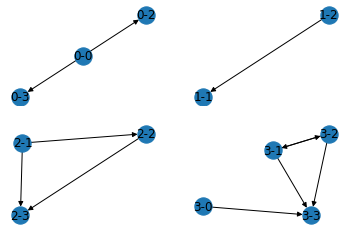

In [28]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np


class DiGraph:
    def __init__(self, nodes=3, times=3):
        self.nodes = nodes
        self.times = times

    def create_adjacency_matrices(self):
        matrices = set()
        while len(matrices) < self.times:
            matrix = [[random.randint(0, 1) for i in range(self.nodes)]
                      for j in range(self.nodes)]
            for i in range(self.nodes):
                matrix[i][i] = 0
                matrix[i][0] = 0
                matrix[self.nodes-1][i] = 0
            for i in range(self.nodes):
                matrix[i] = tuple(matrix[i])
            matrices.add(tuple(matrix))

        return matrices

    def matrices_to_graphs(self, matrices=None):
        if not matrices:
            matrices = self.create_adjacency_matrices()
        graphs = []
        for matrix in matrices:
            graph = defaultdict(list)
            for i in range(self.nodes):
                for j in range(self.nodes):
                    if matrix[i][j] == 1:
                        graph[i].append(j)
            graphs.append(graph)
        return graphs

    def find_all_paths(self, graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return [path]
        if not start in graph:
            return []
        paths = []

        for node in graph[start]:
            if node not in path:
                newpaths = self.find_all_paths(graph, node, end, path)
                for newpath in newpaths:
                    paths.append(newpath)

        return paths

    def construct_graphs_with_paths(self, graphs=None):
        if not graphs:
            graphs = self.matrices_to_graphs()
        graph_with_paths = dict()
        for (i, graph) in enumerate(graphs):
            all_paths = set()
            graph_paths = self.find_all_paths(graph, 0, self.nodes-1)
            for path in graph_paths:
                all_paths.add(tuple(path))
            graph_with_paths[i] = (graph, all_paths)

        return graph_with_paths

    def visualize_graphs(self, graph_with_paths=None):
        if not graph_with_paths:
            graph_with_paths = self.construct_graphs_with_paths()
        graphs = []
        for i in range(len(graph_with_paths)):
            G = nx.DiGraph()
            structure = graph_with_paths[i][0]
            graph_nodes = [str(i) + "-" + str(x)
                           for x in dict(structure).keys()]
            G.add_nodes_from(graph_nodes)
            for (key, vals) in dict(structure).items():
                for val in vals:
                    G.add_edge(*(str(i) + "-" + str(key),
                                 str(i) + "-" + str(val)))
            graphs.append(G)

        return graphs

    def show_at(self, index, graphs=None):
        if not graphs:
            graphs = self.visualize_graphs()

        nx.draw(graphs[index], with_labels=True)

    def create(self, save=True, graphs=None):
        if not graphs:
            graphs = self.visualize_graphs()
        print(graphs[0])
        for (i, graph) in enumerate(graphs):
            print(graph)
            if i >= 4:
                break
            sub = 221 + i
            plt.subplot(sub)
            nx.draw(graph, with_labels=True)

        if save:
            plt.savefig("digraph.png")
        else:
            plt.show()
        
        return graphs
        
digraph = DiGraph(nodes = 4, times = 10)
graphs = digraph.create()



{}
{}
{}
{}
{}


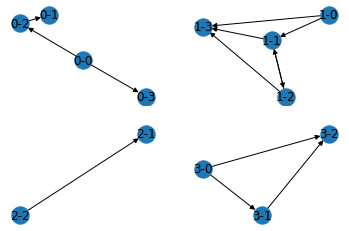